In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = datasets.load_digits()

In [3]:
print (digits.target)

[0 1 2 ... 8 9 8]


In [4]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

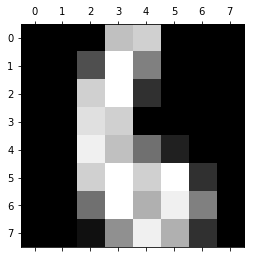

In [5]:
plt.gray()
plt.matshow(digits.images[6])
plt.show()
#Zero is the digit

In [6]:
digits.images.shape

(1797, 8, 8)

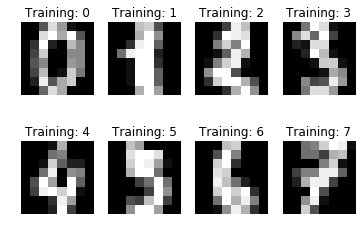

In [7]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image,interpolation='nearest')
    plt.title('Training: %i' % label)

In [8]:
n_samples = len(digits.images)

In [9]:
print (n_samples)

1797


In [10]:
data = digits.images.reshape((n_samples, -1))

In [11]:
data.shape

(1797, 64)

In [12]:
# Create a classifier: a random forest classifier
classifier = RandomForestClassifier(n_estimators=30, criterion='entropy')

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])
predicted

array([8, 3, 4, 9, 0, 8, 9, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 3, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 9, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 0,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 3, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 5, 2, 0, 1, 2, 6, 3, 3, 5, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 3, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 3, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 5, 4,

In [14]:
classifier.score(data[n_samples // 2:], expected)

0.9210233592880979

In [15]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 80  1  2  0  1  0  0  0  7]
 [ 1  0 75  5  0  0  0  0  0  5]
 [ 1  0  0 77  0  4  0  1  7  1]
 [ 2  0  0  0 86  1  0  1  1  1]
 [ 0  0  0  0  0 83  2  0  0  6]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  4  0  1  0  3  0  1 77  2]
 [ 1  0  0  4  0  2  0  1  0 84]]


In [54]:
from PIL import Image

In [55]:
from skimage import io
img = io.imread(r'DIGIT_r.jpg', as_gray=True)

<Figure size 432x288 with 0 Axes>

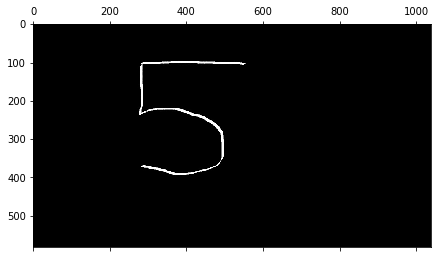

In [56]:
plt.gray()
plt.matshow(img)
plt.show()

<Figure size 432x288 with 0 Axes>

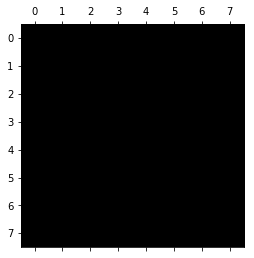

In [57]:
img.resize(8,8)
plt.gray()
plt.matshow(img)
plt.show()

In [58]:
print (img.shape)
data_digit = img.reshape((1, -1))
print (data_digit.shape)



(8, 8)
(1, 64)


In [59]:
predicted = classifier.predict(data_digit)
print (predicted)

[7]


In [60]:
#import cv2
#filename_r = r'C:\Users\BIPIN\Desktop\DIGIT_4.jpg'
#filename_w = r'C:\Users\BIPIN\Desktop\DIGIT_w.jpg'
#img_r = cv2.imread(filename_r)
#cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
#cv2.imshow('image', img_r)
#img_r = cv2.cvtColor(img_r, cv2.COLOR_BGR2GRAY)
#newimg_w = cv2.resize(img_r,(int(8),int(8)))
#cv2.imshow("Show by CV2",newimg_w)
#cv2.imwrite(filename_w,newimg_w)

#cv2.waitKey()